In [1]:
#code to look at runs of spr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
#fname = 'gamescores_battle_zone.dat'
game = 'up_n_down'
fname = 'gamescores_'+game+'.dat'
dat = pd.read_csv(fname,header=None,names=['name','score'])

In [75]:
#reported mean spr scores over 10 random seeds, table 4 of paper
scoredict = {'battle_zone':16651.0, 'boxing':35.8, 'breakout':17.1 , 'demon_attack':545.2 ,'frostbite':1821.5,
            'hero':7019.2, 'kangaroo':3276.4, 'road_runner':14220.5, 'up_n_down':28138.5}

In [76]:
#USE THIS ON BATTLE_ZONE ONLY. some bogus data made it in
#dat = dat.iloc[4:,:]
#dat = dat[dat['score'] != ' |']

In [77]:
dat

,name,score
0,up_n_down_j0_10,3877.7
1,up_n_down_j0_1,2554.4
2,up_n_down_j0_2,4250.6
3,up_n_down_j0_3,3773.8
4,up_n_down_j0_4,4251.8
5,up_n_down_j0_5,3932.0
6,up_n_down_j0_6,4204.8
7,up_n_down_j0_7,5430.7
8,up_n_down_j0_8,7236.6
9,up_n_down_j0_9,7637.6


In [79]:
jump_idx = 3 #for up_n_down

#jump_idx = 2 #for underscored games

#jump_idx = 1 #for non-underscored games
seed_idx = jump_idx +1

dat['jump'] = np.array([int(k.split('_')[jump_idx][1:]) for k in dat['name']])
dat['seed'] = np.array([int(k.split('_')[seed_idx]) for k in dat['name']])
dat['score'] = np.array(dat['score']).astype('float')


In [80]:
jumpvec = range(6)
seedvec = range(1,11)
game_mean = np.zeros((len(jumpvec),))
game_sem = np.zeros((len(jumpvec),))

for j in range(len(jumpvec)):
    game_mean[j] = np.mean(dat[dat['jump']==jumpvec[j]]['score'])
    game_sem[j] = np.std(dat[dat['jump']==jumpvec[j]]['score'])/np.sqrt(10)

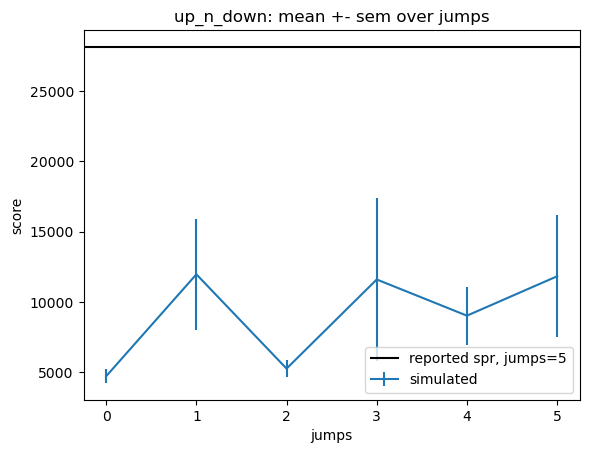

In [81]:
plt.errorbar(jumpvec,game_mean,game_sem,label='simulated')
plt.title(game+': mean +- sem over jumps')
plt.axhline(scoredict[game],0,5,color='k',label='reported spr, jumps=5')
plt.xlabel('jumps')
plt.ylabel('score')
plt.legend()
plt.show()